In [92]:
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering

- Gathering data from csv

In [93]:
df_1=pd.read_csv('twitter_archive_enhanced.csv')

- Gathering data from Internet

In [94]:
folder_name='new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [95]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
#print(response,"...")

In [96]:
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [97]:
df_2=pd.read_csv('image_predictions.tsv', sep='\t')

- Gathering from API

In [98]:
'''import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        #except tweepy.TweepError as e:
        except tweepy.errors.TweepError as e:

            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tw

In [99]:
import json

# convert the json text file into list
df_list=[]
with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

#print(df_list[0])


In [100]:
# create dataframe from the previos list
# that contains tweetID, like, retweet
tweet_data=pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])

In [101]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [102]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [103]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [104]:
df_1.shape

(2356, 17)

In [105]:
df_2.shape

(2075, 12)

In [106]:
tweet_data.shape

(2354, 3)

In [107]:
tweet_data.rename(columns={'id':'tweet_id'})

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [108]:
tweet_data.to_csv('df_3.csv',index=False)

## Assessing Data
Inspecting the dataset for two things: data quality(content missing, duplicate, null..) & data lack of tidness (structure issue)

- 1-Assess_'twitter-archive-data'

In [109]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [110]:
df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


##### Programatic assessing

In [111]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [112]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [113]:
# check the duplication
sum(df_1.duplicated())

0

In [114]:
# checjing the type of source
df_1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

-It's clear iphone users are the most 

In [115]:
# investigate the dominators rating
df_1['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [116]:
# investigate the dominators rating
df_1['rating_denominator'].value_counts().sort_index()


0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

-We can find irregular data less than 10 (7 -0-2)

In [117]:
# find number of retweet in dataset
df_1[df_1['retweeted_status_id'].isnull()==False].count()['tweet_id']

181

-There is 181 retweet should remove we need only the origenal data

- 2-Assess_image-predictions

In [118]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [119]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [120]:
df_2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [121]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [122]:
# checking the value of image_num, is anything irregullar or not
df_2['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [123]:
# chcking p1
df_2['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [124]:
df_2['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [125]:
df_2['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [126]:
df_2['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [127]:
df_2['p2_conf'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [128]:
df_2['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [129]:
sum(df_2['tweet_id'].duplicated())

0

In [130]:
sum(df_2['jpg_url'].duplicated())


66

In [131]:
sum(df_2['jpg_url'].isna())

0

In [132]:
sum(df_2['jpg_url'].isnull())

0

- 3-Assess_tweet-data

In [133]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [134]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [135]:
sum(tweet_data['retweet_count'].isna())

0

In [136]:
sum(tweet_data['retweet_count'].isnull())

0

In [137]:
sum(tweet_data['favorite_count'].isnull())

0

In [138]:
sum(tweet_data['favorite_count'].isna())

0

In [139]:
sum(tweet_data['id'].duplicated()==True)

0

In [140]:
tweet_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
 - Data Archive
1. 'name' column has unmeaning data like (a,an, such..) 
2. 'rating_denominator' column have incorrect data (0,2,7) should be grater than 10
3. 'retweeted_status_timestamp' column should be with type date time 
4. id variables not consistent in columns in some integer and other float (sould be consistent)
5. remove retweet from dataset and keep only the origenal tweets
6. dog name are not standrize

  - Image Predection

7. The predections in p1,p2,p3 names mixed capital and small letters
8. The p1,p2,p2 havs - ratherthan _
9. there are 2075 present in df_2(image predection)while 2356 in df_1 (archive data) there is missing data
10. tweet_id to string

  - Json File (Tweeter _API)

11. rename column id to tweet_id
12. convert type id to str
13. there are 2354 present in tweet_datawhile 2356 in df_1 (archive data) there is missing data --> two missing data

### Tidiness issues
1. columns of dog type should be one column insted of 4
2. merge all 3 dataframe (df_1, df_2.df_3)in one dataframe.

## Cleaning Data

Make copy of all dataframe

In [141]:
# copy all the dataset
df_1_copy=df_1.copy()
df_2_copy=df_2.copy()
df_3_copy=tweet_data.copy()

1-Data Archive (df_2)

### Issue #1: 
- Quality: 'name' column has unmeaning data like (a,an, such..)

#### Define
clean the coumn 'name' remove un clear name with 'None' word

#### Code

In [142]:
# find the words with a small letter in the name column
df_1_copy[df_1_copy['name'].str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [143]:
junk_data = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
             'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
             'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
             'officially', 'life', 'light', 'space']

In [144]:
# replace the junk names with None
for x in junk_data:
    df_1_copy.name.replace(x, 'None', inplace=True)

##### Test

In [145]:
df_1_copy[df_1_copy['name'].str.islower()==True]['name'].unique()

array([], dtype=object)

In [146]:
df_1_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

-maybe this way wasn't enugh but at least removing unmeaning names,

### Issue #2
- Quality: 'rating_denominator' column have incorrect data (0,2,7) should be grater than 10

##### Define
Replace all 'rating_denominator' with 10

##### Code

In [147]:
df_1_copy.rating_denominator=df_1_copy['rating_denominator']=10

##### Test

In [148]:
df_1_copy.rating_denominator.unique()

array([10], dtype=int64)

### Issue #3
- Quality: 'timestamp','retweeted_status_timestamp' column should be type date time

##### Define
convert the type to datetime type.

In [149]:
df_1_copy['timestamp'] = pd.to_datetime(df_1_copy['timestamp'])
df_1_copy['retweeted_status_timestamp'] = pd.to_datetime(df_1_copy['retweeted_status_timestamp'])


##### Test

In [150]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #4
- Quality: id variables not consistent in columns in some integer and other float (sould be consistent)

##### Define
convert id's type to str. 
because these id wont apply in any caculation it's type shoul be string

##### Code

In [151]:
df_1_copy['tweet_id']=df_1_copy['tweet_id'].astype(str)
df_1_copy['in_reply_to_status_id']=df_1_copy['in_reply_to_status_id'].astype(str)
df_1_copy['in_reply_to_user_id']=df_1_copy['in_reply_to_user_id'].astype(str)
#df_1_copy['retweeted_status_id']=df_1_copy['retweeted_status_id'].astype(str)
#df_1_copy['retweeted_status_user_id']=df_1_copy['retweeted_status_user_id'].astype(str)

###### Test

In [152]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #1
- Tidiness: columns of dog type should be one column insted of 4

##### Define
- create new column dog_stage contain the type of column
- remove columns doggo,floofer,pupper,puppo

##### Code

In [153]:
# use the Text column and extract the stage of the dog from
df_1_copy['dog_stage']=df_1_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [154]:
#remove 'doggo','floofer','pupper','puppo' columns
df_1_copy=df_1_copy.drop(columns=['doggo','floofer','pupper','puppo'])

##### Test

In [155]:
df_1_copy.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1749,679047485189439488,nan,nan,2015-12-21 21:15:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/679047485...,9,10,None,NaN
1873,675145476954566656,nan,nan,2015-12-11 02:49:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675145476...,9,10,None,NaN
2017,672160042234327040,nan,nan,2015-12-02 21:06:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,pupper


In [156]:
df_1_copy['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

In [157]:
df_1_copy.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [158]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #5
Quality: remove retweet from dataset and keep only the origenal tweets

##### Define
Remove 181 retweet based on retweet_status_id column, and keep only the origenal tweets

##### Code

In [159]:
num_null=df_1[df_1['retweeted_status_id'].isnull()==False].count()['tweet_id']

In [160]:
num_null

181

In [161]:
df_1_copy=df_1_copy[df_1_copy['retweeted_status_id'].isnull()]


In [162]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       2175 non-null   object             
 2   in_reply_to_user_id         2175 non-null   object             
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [163]:
# remove related columns
df_1_copy=df_1_copy.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

##### Test

In [164]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  2175 non-null   object             
 2   in_reply_to_user_id    2175 non-null   object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stage              364 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory us

2- Predection Image (df_2)

### Issue #7
Quality: the predections in p1,p2,p3 names mixed capital and small letters

##### Define
Capitalize each word in predection p1,p2,p3

##### Code

In [165]:
df_2_copy.p1=df_2_copy.p1.str.capitalize()
df_2_copy.p2=df_2_copy.p2.str.capitalize()
df_2_copy.p3=df_2_copy.p3.str.capitalize()

##### Test

In [166]:
df_2_copy.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #8
Quality:: The p1,p2,p2 havs - ratherthan _

##### Define
replace the "_" and "-" with " " in the p1,p2,p3

##### Code

In [167]:
df_2_copy.p1=df_2_copy.p1.str.replace('_',' ')
df_2_copy.p1=df_2_copy.p2.str.replace('_',' ')
df_2_copy.p1=df_2_copy.p3.str.replace('_',' ')
df_2_copy.p1=df_2_copy.p1.str.replace('-',' ')
df_2_copy.p1=df_2_copy.p2.str.replace('-',' ')
df_2_copy.p1=df_2_copy.p3.str.replace('-',' ')

##### Test

In [168]:
df_2_copy.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,German_short haired_pointer,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Spatula,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Kelpie,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Papillon,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Banana,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


In [169]:
df_2_copy.tweet_id=df_2_copy.tweet_id.astype(str)

In [170]:
df_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


3- Json Api data (df_3)

### Issue #12
id type is object

##### Define
convert 'id' type to str

In [171]:
df_3_copy.id=df_3_copy.id.astype(str)

### Issue #11
Quality: Convert column id to tweet_id

##### Define
rename column name id to tweet_id, retweet_count to retweets ,favorite_count to likes

In [172]:
df_3_copy.rename(columns={'id': 'tweet_id','retweet_count':'retweets','favorite_count':'likes'}, inplace=True)

##### Test

In [173]:
df_3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2354 non-null   object
 1   retweets  2354 non-null   int64 
 2   likes     2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [174]:
df_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [175]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  2175 non-null   object             
 2   in_reply_to_user_id    2175 non-null   object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stage              364 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory us

### Issue# 2
Tidiness: we have three different datatype should merge

##### Define
merge all three dataset togather based on tweet_id key,
i chose the inner join to keep only the completed data in all three dataframe

##### Code

In [184]:
# merge df1_copy with df_2_copy by tweet_id
df_1_copy=pd.merge(df_1_copy, df_2_copy, how='inner', on='tweet_id')

In [186]:
#merge result of df_1_copy with df_3_copy
df_1_copy=pd.merge(df_1_copy, df_3_copy, how='inner', on='tweet_id')

## Storing Data

In [189]:
df_1_copy.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

##### 1-Percentage of dog stages

In [190]:
stage=df_1_copy.dog_stage.value_counts()
stage

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

Text(0.5, 1.0, 'percentage of dog stage')

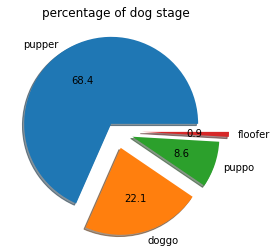

In [191]:
plt.pie(stage, labels=['pupper','doggo','puppo','floofer'], autopct='%1.1f', explode=(.1,.2,.2,.3),shadow=True)
plt.title('percentage of dog stage')


> Insight: as showen the pupper dog is the higjest perecntage and floofer is the lowest


- 2- Relation between likes count and retweet counts

Text(0, 0.5, 'Retweet Counts')

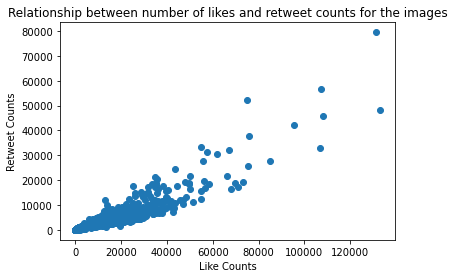

In [192]:
plt.scatter(df_1_copy.likes, df_1_copy.retweets)
plt.title('Relationship between number of likes and retweet counts for the images')
plt.xlabel('Like Counts')
plt.ylabel('Retweet Counts')

> - Insight: Here we notice a liner realtion between retweet and likes
> - it's strong in range from 0 to 40000 likes and after that it get week

- 3- Relation between dog stage and like count

Text(0.5, 1.0, 'Relationship between dog stage and likes count')

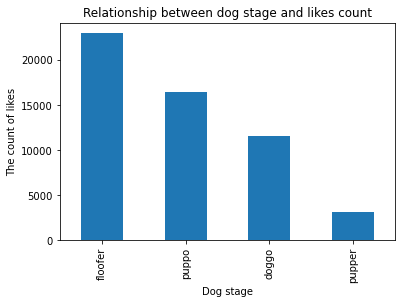

In [194]:
df_1_copy.groupby('dog_stage')['likes'].median().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('Dog stage')
plt.ylabel('The count of likes')
plt.title("Relationship between dog stage and likes count")

- 4- Relation between dog stage and retweet count

Text(0.5, 1.0, 'Relationship between dog stage and retweet count')

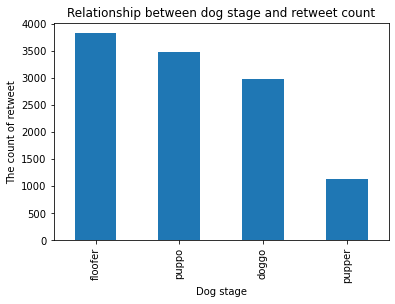

In [195]:
df_1_copy.groupby('dog_stage')['retweets'].median().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('Dog stage')
plt.ylabel('The count of retweet')
plt.title("Relationship between dog stage and retweet count")

> Insight: from previous two image we can see the floofer dog got the largest number of likes and retweet, although the puppy dogs are represent the highest percent of type in dataset.